==========
Davis Club
==========

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite


In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


Explore degrees for each partition

In [3]:
w_degs, c_degs = bipartite.degrees(G, clubs)
w_degs

{'Sylvia Avondale': 7,
 'Myra Liddel': 4,
 'Eleanor Nye': 4,
 'Laura Mandeville': 7,
 'Flora Price': 2,
 'Frances Anderson': 4,
 'Pearl Oglethorpe': 3,
 'Evelyn Jefferson': 8,
 'Katherina Rogers': 6,
 'Helen Lloyd': 5,
 'Charlotte McDowd': 4,
 'Olivia Carleton': 2,
 'Brenda Rogers': 7,
 'Nora Fayette': 8,
 'Ruth DeSand': 4,
 'Verne Sanderson': 4,
 'Dorothy Murchison': 2,
 'Theresa Anderson': 8}

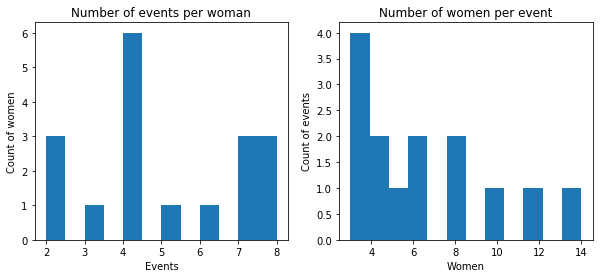

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(w_degs.values(), bins=12)
plt.title('Number of events per woman')
plt.xlabel('Events')
plt.ylabel('Count of women')
plt.subplot(122)
plt.hist(c_degs.values(), bins=12)
plt.title('Number of women per event')
plt.xlabel('Women')
plt.ylabel('Count of events');

Everyone attended at least 2 events, the most common number of events to have attended is 4, and a third of the people went to 7 or 8 events.

The most common number of attendees from this group at an event is only 3, but the average number is over 6. The two largest events had 12 and 14 from this group.

In [3]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


Using common attendance at a social event as a yardstick for friendship, we see that 7 of the women in this group are friends with everyone, another 4 are only missing friendship with one person, and 4 more lack only 2 links.  The "less connected/more exclusive" members of this group are just 3 people who are still friends with 2/3 of the group.  It might be interesting to see if those 3 are in their own small group that competes with a large group, or maybe for all we know two events were scheduled at the same time and these 3 had to opt for the smaller occasion for some reason.

In [5]:
less_connected = [(name, event, c_degs[event]) for (name, event, _) in G.edges(data=True)
                  if name in {'Olivia Carleton', 'Flora Price', 'Charlotte McDowd'}]
print('(Name, Event, Attendees from this group)')
less_connected

(Name, Event, Attendees from this group)


[('Charlotte McDowd', 'E3', 6),
 ('Charlotte McDowd', 'E4', 4),
 ('Charlotte McDowd', 'E5', 8),
 ('Charlotte McDowd', 'E7', 10),
 ('Olivia Carleton', 'E9', 12),
 ('Olivia Carleton', 'E11', 4),
 ('Flora Price', 'E9', 12),
 ('Flora Price', 'E11', 4)]

Olivia and Flora only attended the same 2 events (E9 and E11), so they are probably a close pair of wingmen who aren't extremely social otherwise.

Charlotte is an interesting case because she's the least connected by degree in the projected graph, yet she attended 4 events with significant numbers of attendees.  Still, she missed out on the 2 biggest events, which is where everyone else became friends with Olivia and Flora and a couple of others who only attended 2 or 3 events.

#### Same procedure for events:

In [6]:
# project bipartite graph onto women nodes
E = bipartite.projected_graph(G, clubs)
print()
print("Connected events | Event  |   Attendees")
for c in clubs:
    print(f"{E.degree(c)}                   {c}         {c_degs[c]}")


Connected events | Event  |   Attendees
8                   E1         3
8                   E2         3
8                   E3         6
8                   E4         4
8                   E5         8
13                   E6         8
13                   E7         10
13                   E8         14
13                   E9         12
8                   E10         5
8                   E11         4
8                   E12         6
8                   E13         3
8                   E14         3


Events 6 through 9 are connected to all other events by at least one attendee, which would be expected after a glance at the high numbers of members at E6-E9.

Of possible interest is the question of why E5 and E6 each had 8 attendees from this group, yet E6 is connected to every other event while E5 is missing 5 links.  Let's see who's responsible.

In [7]:
linkers = [(name, event, w_degs[name]) for (name, event, _) in G.edges(data=True)
                  if event in ['E5','E6']]
print('(Name, Event, Events Attended by Member)')
linkers

(Name, Event, Events Attended by Member)


[('Evelyn Jefferson', 'E5', 8),
 ('Evelyn Jefferson', 'E6', 8),
 ('Laura Mandeville', 'E5', 7),
 ('Laura Mandeville', 'E6', 7),
 ('Theresa Anderson', 'E5', 8),
 ('Theresa Anderson', 'E6', 8),
 ('Brenda Rogers', 'E5', 7),
 ('Brenda Rogers', 'E6', 7),
 ('Charlotte McDowd', 'E5', 4),
 ('Frances Anderson', 'E5', 4),
 ('Frances Anderson', 'E6', 4),
 ('Eleanor Nye', 'E5', 4),
 ('Eleanor Nye', 'E6', 4),
 ('Pearl Oglethorpe', 'E6', 3),
 ('Ruth DeSand', 'E5', 4),
 ('Nora Fayette', 'E6', 8)]

Who went to only one of those two events?

In [8]:
names, events, counts = list(zip(*linkers))
for n in range(len(names)):
    if names.count(names[n]) == 1:
        print(names[n], events[n], counts[n])

Charlotte McDowd E5 4
Pearl Oglethorpe E6 3
Ruth DeSand E5 4
Nora Fayette E6 8


It appears that Nora may have a "between" role in connecting different types of events.

In [4]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")
    


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consist

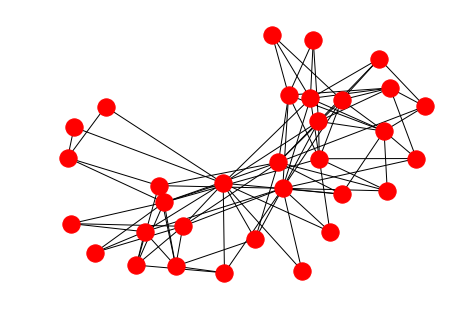

In [5]:
nx.draw(G)
plt.show()

What can you infer about the relationships between (1) the women, and (2) the social events?